In [1]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.utils import tokenize
import pandas as pd

In [2]:
# got this from here: https://github.com/reddzzz/DataScience_FP/blob/main/dataset.xlsx
df = pd.read_excel("/Users/johntemplon/Downloads/dataset.xlsx")

In [3]:
df.head()

,Unnamed: 0,id,human_summary,publication,author,date,year,month,theme,content
0,0,17283,In successfully seeking a temporary halt in th...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,politics,WASHINGTON — Congressional Republicans have...
1,0,17284,Officers put her in worse danger some months l...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,crime,"After the bullet shells get counted, the blood..."
2,0,17285,The film striking appearance had been created ...,New York Times,Margalit Fox,2017-01-06,2017.0,1.0,entertainment,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,0,17286,The year was only days old when the news came ...,New York Times,William McDonald,2017-04-10,2017.0,4.0,entertainment,"Death may be the great equalizer, but it isn’t..."
4,0,17287,If North Korea conducts a test in coming month...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,politics,"SEOUL, South Korea — North Korea’s leader, ..."


In [4]:
# there appears to be one bad row, so we're going to remove it
nyt_df = df.loc[lambda x: x['publication'] == 'New York Times'].copy()

In [5]:
nyt_df['publication'].value_counts()

publication
New York Times    999
Name: count, dtype: int64

In [6]:
nyt_df['theme'].value_counts()

theme
politics         324
business         208
entertainment    153
crime            110
lifestyle         78
law               41
sports            30
science           24
technology        18
architecture       4
accidents          4
art                2
health             2
environment        1
Name: count, dtype: int64

## Let's Clean The Text

In [7]:
nyt_df['tokens'] = nyt_df['content'].apply(lambda x: list(tokenize(x, lower=True)))

In [8]:
nyt_df.head()

,Unnamed: 0,id,human_summary,publication,author,date,year,month,theme,content,tokens
0,0,17283,In successfully seeking a temporary halt in th...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,politics,WASHINGTON — Congressional Republicans have...,"[washington, congressional, republicans, have,..."
1,0,17284,Officers put her in worse danger some months l...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,crime,"After the bullet shells get counted, the blood...","[after, the, bullet, shells, get, counted, the..."
2,0,17285,The film striking appearance had been created ...,New York Times,Margalit Fox,2017-01-06,2017.0,1.0,entertainment,"When Walt Disney’s “Bambi” opened in 1942, cri...","[when, walt, disney, s, bambi, opened, in, cri..."
3,0,17286,The year was only days old when the news came ...,New York Times,William McDonald,2017-04-10,2017.0,4.0,entertainment,"Death may be the great equalizer, but it isn’t...","[death, may, be, the, great, equalizer, but, i..."
4,0,17287,If North Korea conducts a test in coming month...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,politics,"SEOUL, South Korea — North Korea’s leader, ...","[seoul, south, korea, north, korea, s, leader,..."


In [9]:
nyt_df['tokens'].values[0]

['washington',
 'congressional',
 'republicans',
 'have',
 'a',
 'new',
 'fear',
 'when',
 'it',
 'comes',
 'to',
 'their',
 'health',
 'care',
 'lawsuit',
 'against',
 'the',
 'obama',
 'administration',
 'they',
 'might',
 'win',
 'the',
 'incoming',
 'trump',
 'administration',
 'could',
 'choose',
 'to',
 'no',
 'longer',
 'defend',
 'the',
 'executive',
 'branch',
 'against',
 'the',
 'suit',
 'which',
 'challenges',
 'the',
 'administration',
 's',
 'authority',
 'to',
 'spend',
 'billions',
 'of',
 'dollars',
 'on',
 'health',
 'insurance',
 'subsidies',
 'for',
 'and',
 'americans',
 'handing',
 'house',
 'republicans',
 'a',
 'big',
 'victory',
 'on',
 'issues',
 'but',
 'a',
 'sudden',
 'loss',
 'of',
 'the',
 'disputed',
 'subsidies',
 'could',
 'conceivably',
 'cause',
 'the',
 'health',
 'care',
 'program',
 'to',
 'implode',
 'leaving',
 'millions',
 'of',
 'people',
 'without',
 'access',
 'to',
 'health',
 'insurance',
 'before',
 'republicans',
 'have',
 'prepared',
 '

In [10]:
nyt_df.shape

(999, 11)

## Word2Vec Model

In [11]:
model = Word2Vec(nyt_df['tokens'].values)

In [12]:
print(model)

Word2Vec<vocab=13204, vector_size=100, alpha=0.025>


In [13]:
words = list(model.wv.key_to_index)

In [14]:
words[:10]

['the', 'to', 'a', 'of', 'and', 'in', 'that', 's', 'for', 'mr']

In [15]:
model.save('model.bin')

In [16]:
new_model = Word2Vec.load('model.bin')

In [17]:
nyt_df['embeddings'] = nyt_df['tokens'].apply(lambda x: [ new_model.wv[t] for t in x if t in words ])

In [18]:
nyt_df['embeddings'].values[0]

[array([-0.2541348 ,  0.1352232 ,  1.3243597 ,  0.32680762, -0.6997434 ,
        -0.89685166, -0.16369848,  1.4511163 , -0.95677507, -0.8860173 ,
        -0.12154022, -0.71604633, -0.05230755, -0.17756477, -0.15239199,
        -0.5380703 , -0.0305706 , -0.6805737 , -0.47740495, -1.5817164 ,
        -0.27418914,  0.34047082,  0.19593741, -0.47598776, -0.29152474,
         1.0499063 , -0.44133538, -0.16665249, -0.07276996,  0.3801232 ,
         0.23119928, -0.03289015, -0.40769243,  1.0335683 ,  0.24378647,
         0.03401695,  0.2376881 , -0.7778749 , -0.01539948, -0.7739068 ,
        -0.11587808, -0.21268208, -0.86418724,  0.4466175 ,  0.85839486,
        -0.14552023,  0.42718244, -0.07113834, -0.34816703,  0.08199378,
         0.31346107,  0.09241645, -0.6156471 ,  0.50344896,  0.16636205,
        -0.55083567, -0.24867463, -0.2937567 ,  0.05239419,  0.11110366,
        -0.62198144,  0.3952679 ,  0.7970304 , -0.2880907 ,  0.6127397 ,
         0.6341361 ,  0.21059507,  0.15540902, -0.5

In [19]:
nyt_df['average_embedding'] = nyt_df['embeddings'].apply(lambda x: sum(x) / len(x))

In [20]:
nyt_df['average_embedding'].values[0]

array([-0.26945508,  0.3609773 ,  0.49160925, -0.21530268,  0.38572195,
       -0.48702937,  0.2160839 ,  0.70462286, -0.2214459 , -0.2794442 ,
       -0.1054977 , -0.57080054, -0.08400524, -0.00383969,  0.09537895,
       -0.14086246,  0.240843  , -0.42371213, -0.05048171, -1.0636741 ,
       -0.2174416 ,  0.22789438,  0.7772934 , -0.29949993,  0.20452942,
       -0.08903086, -0.23799913,  0.02158755, -0.20977181,  0.21643968,
       -0.01311387, -0.00480985,  0.10790627, -0.05649989, -0.04891379,
        0.11888967,  0.18702361, -0.3549735 ,  0.18805882, -0.46080843,
        0.15491661, -0.2642123 , -0.01357468, -0.25972947,  0.5377776 ,
        0.02125108, -0.05058593, -0.09913058,  0.03489945,  0.23543948,
        0.35827532, -0.3797324 , -0.01447693,  0.11494075, -0.16227537,
        0.06575479,  0.0308804 , -0.3122234 , -0.06309368,  0.2376734 ,
        0.09870883,  0.1434749 ,  0.04372507,  0.04609193, -0.0289354 ,
        0.3839183 , -0.02797471,  0.12697925, -0.30570742,  0.51

## Remember KMeans?

In [21]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [22]:
inertias = []

In [23]:
for i in range(1,14):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(nyt_df["average_embedding"].to_list())
    inertias.append(kmeans.inertia_)

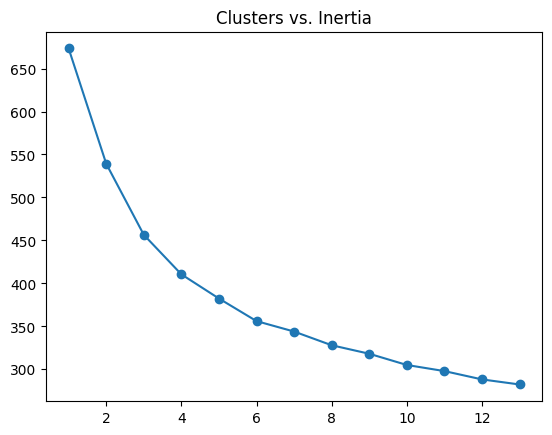

In [24]:
plt.plot(range(1,14), inertias, marker='o')
plt.title('Clusters vs. Inertia')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=7)

In [26]:
kmeans.fit(nyt_df["average_embedding"].tolist())

KMeans(n_clusters=7)

In [27]:
nyt_df['group'] = kmeans.labels_

In [28]:
nyt_df.loc[lambda x: x['group'] == 0]['theme'].value_counts()

theme
business         40
entertainment    32
politics         30
lifestyle        24
crime            16
science          15
technology       10
sports            4
law               4
architecture      2
health            1
accidents         1
art               1
Name: count, dtype: int64

In [29]:
nyt_df.groupby('group')['theme'].value_counts().to_frame().unstack().fillna(0)

count                                                              \
theme accidents architecture  art business crime entertainment environment    
group                                                                         
0           1.0          2.0  1.0     40.0  16.0          32.0          0.0   
1           0.0          0.0  1.0      9.0  10.0          22.0          0.0   
2           0.0          0.0  0.0     52.0   9.0           6.0          0.0   
3           0.0          0.0  0.0     14.0   2.0          18.0          0.0   
4           1.0          1.0  0.0     26.0   9.0           4.0          0.0   
5           0.0          0.0  0.0     35.0  19.0          38.0          0.0   
6           2.0          1.0  0.0     32.0  45.0          33.0          1.0   

                                                                 
theme health   law lifestyle politics science sports technology  
group                                                            
0        1.0   4.0      24.0     30.0    15.0    4.0       10.0  
1        0.0   4.0       6.0     13.0     1.0    2.0        1.0  
2        0.0   6.0       2.0    100.0     1.0    2.0        1.0  
3        1.0   3.0      18.0     13.0     3.0    1.0        2.0  
4        0.0  13.0       6.0     71.0     1.0    3.0        2.0  
5        0.0   6.0      15.0     44.0     1.0   10.0        2.0  
6        0.0   5.0       7.0     53.0     2.0    8.0        0.0

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
grouped = nyt_df.groupby('group')['tokens'].apply(lambda x: sum(x, [])).reset_index()

In [32]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)  # Disable default string processing
X = vectorizer.fit_transform(grouped['tokens'])

/Users/johntemplon/cuny/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [33]:
count_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=grouped['group'])

In [34]:
count_df.T.loc['trump']

group
0    0.017618
1    0.007681
2    0.124892
3    0.014890
4    0.080593
5    0.037810
6    0.015265
Name: trump, dtype: float64

In [35]:
word_tfidf = count_df.T

In [36]:
word_tfidf['group_1_2_diff'] = word_tfidf.apply(lambda x: abs(x[1] - x[2]), axis=1)

In [37]:
word_tfidf.sort_values('group_1_2_diff', ascending=False).head(20)

group,0,1,2,3,4,5,6,group_1_2_diff
she,0.021397,0.202811,0.019031,0.038914,0.009734,0.035567,0.012090,0.183780
her,0.018796,0.195378,0.015773,0.029154,0.004581,0.034071,0.010991,0.179604
mr,0.037199,0.066158,0.224237,0.022397,0.112730,0.100132,0.068388,0.158079
trump,0.017618,0.007681,0.124892,0.014890,0.080593,0.037810,0.015265,0.117211
ms,0.008539,0.108777,0.020428,0.010886,0.005440,0.027289,0.009098,0.088350
the,0.659921,0.544877,0.629840,0.531152,0.680317,0.632991,0.711908,0.084963
i,0.029936,0.109892,0.036304,0.190814,0.016033,0.064138,0.017647,0.073588
and,0.265843,0.293128,0.220876,0.319067,0.227393,0.268780,0.236611,0.072253
was,0.062915,0.152387,0.084968,0.082332,0.048313,0.112735,0.084752,0.067419
in,0.230165,0.269465,0.203758,0.199198,0.210573,0.236631,0.267508,0.065707


## Fun Word2Vec Math

In [38]:
filename = 'GoogleNews-vectors-negative300.bin'
google_model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [39]:
result = google_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

In [40]:
result

[('queen', 0.7118192911148071)]

In [41]:
google_model.most_similar(positive=['women', 'kings'], negative=['men'], topn=1)

[('queens', 0.5838640332221985)]

----

----

----